In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def filtering(image, mask):
  sr = int(mask.shape[0]/2)
  sc = int(mask.shape[1]/2)
  
  ir = image.shape[0]
  ic = image.shape[1]
  
  ni = np.zeros((ir + 2*sr, ic + 2*sc), np.float32)
  ni[sr:sr + ir, sc: sc + ic] = image
  
  ans = np.zeros(ni.shape)
  
  for i in range(sr, sr + ir):
    for j in range(sc, sc + ic):
      aux = ni[i - sr: sr + i + 1, j - sc: sc + j + 1]
      ans[i,j] = np.sum(aux*mask)
  return ans

In [0]:
img = cv2.imread("lorito.jpg", 0)
x = 3
mask = (1/x**2)*np.ones((x,x))
mask_ = np.array([[1,2,1], [2,4,2], [1,2,1]])
mask_ = (1/16)*mask_

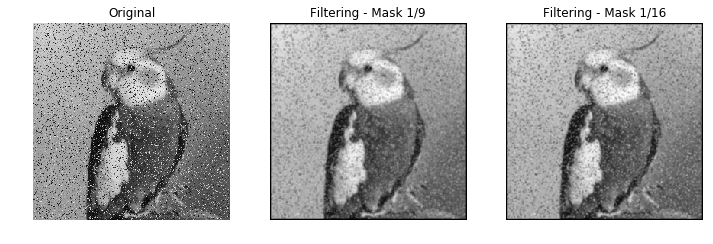

In [42]:
im_f1 = filtering(img, mask)
im_f2 = filtering(img, mask_)

plt.figure(figsize=[12,12])
plt.subplot(1,3,1), plt.imshow(img, cmap = "gray") , plt.axis("off"), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(im_f1, cmap = "gray"), plt.axis("off"), plt.title("Filtering - Mask 1/9")
plt.subplot(1,3,3), plt.imshow(im_f2, cmap = "gray"), plt.axis("off"), plt.title("Filtering - Mask 1/16")
plt.show()